<a href="https://colab.research.google.com/github/sarobar412/machine_learning-and-deep-learning/blob/main/Classification_of_images_using_CIFAR_10_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION OF IMAGES IN CIFAR-10 DATASET USING CNN**

Importing of Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input,Dense, Activation, Flatten, Conv2D, MaxPooling2D

Loading of Dataset

In [2]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

So there is 50000 training samples and 10000 testing samples

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification 1D array will do its work successfully. so we will convert this to now 1D array.

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

Making the list of classes

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Now Let's see the images

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

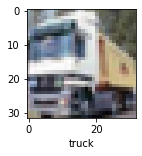

In [10]:
plot_sample(X_train, y_train, 1)

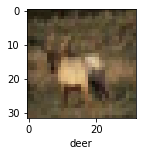

In [11]:
plot_sample(X_train, y_train, 3)

Normalizing the training data

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Building the model

In [13]:
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [15]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.1,
    horizontal_flip = True,
    )
train_generator = train_datagen.flow(X_train,
                                       y_train,
                                       batch_size=32)


In [16]:
history = model.fit(train_generator,
                    epochs=100, 
                    validation_data=(X_test, y_test),shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 32s 19ms/step - loss: 1.7069 - accuracy: 0.3718 - val_loss: 1.4606 - val_accuracy: 0.4717
Epoch 2/100
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4165 - accuracy: 0.4870 - val_loss: 1.1231 - val_accuracy: 0.5976
Epoch 3/100
1563/1563 [==============================] - 29s 18ms/step - loss: 1.2776 - accuracy: 0.5438 - val_loss: 1.1582 - val_accuracy: 0.5937
Epoch 4/100
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2087 - accuracy: 0.5708 - val_loss: 1.0943 - val_accuracy: 0.6218
Epoch 5/100
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1572 - accuracy: 0.5911 - val_loss: 1.1226 - val_accuracy: 0.6157
Epoch 6/100
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1145 - accuracy: 0.6049 - val_loss: 0.9191 - val_accuracy: 0.6809
Epoch 7/100
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0844 - accuracy: 0.6196 - val_loss: 0

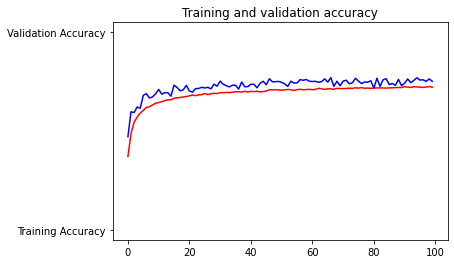

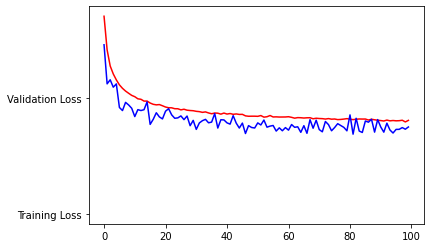

In [17]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [18]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[3.07018380e-03, 6.55066222e-02, 1.13749839e-02, 4.64523315e-01,
        1.96910277e-03, 1.23517349e-01, 3.06753553e-02, 2.23351060e-03,
        3.97190489e-02, 2.57410556e-01],
       [6.59610610e-04, 3.14161507e-03, 1.08772336e-09, 4.06084472e-10,
        8.33982026e-13, 2.45581668e-14, 1.30781667e-14, 2.89028458e-13,
        9.96082664e-01, 1.16160474e-04],
       [2.21686251e-03, 6.17063828e-02, 4.95887980e-06, 9.65774889e-05,
        2.09778335e-07, 1.22617976e-07, 1.93887195e-06, 1.00703301e-06,
        9.26216960e-01, 9.75498650e-03],
       [2.00978413e-01, 4.60760266e-01, 4.03375505e-03, 1.17108924e-02,
        9.09584807e-04, 9.70252368e-05, 7.76094203e-06, 3.10564297e-04,
        2.75893867e-01, 4.52978760e-02],
       [4.07397316e-08, 9.86975920e-07, 5.44062816e-03, 8.08062847e-04,
        4.57006134e-03, 4.13398766e-06, 9.89169776e-01, 1.03937147e-07,
        6.42772420e-07, 5.61828301e-06]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 1, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

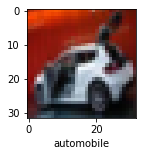

In [24]:
plot_sample(X_test, y_test,6)

In [25]:
classes[y_classes[6]]

'automobile'